In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
df=pd.read_csv("C:/Users/nishita/Downloads/Seller_Quantity_Data.csv")

In [335]:
df.head(10)

,ListingID,SellerID,ItemName,Status,PurchasePrice,ListingQuantity
0,LT0122011,18752,PET Bottle Scrap Baled - Clear,REJECTED,50.0,10000
1,LT0122021,18607,PET Bottle Scrap Baled - Green,REJECTED,50.0,18000
2,LT0122022,19283,PET Bottle Scrap Baled - Clear,REJECTED,46.5,10000
3,LT0122023,19286,PET Bottle Scrap Baled - Clear,REJECTED,54.0,10000
4,LT0122024,19288,PET Liquor Bottle Scrap Baled - With Ring & Cap,REJECTED,100.0,7000
5,LT0122031,19290,PET Liquor Bottle Scrap Baled,REJECTED,50.0,7000
6,LT0122032,19291,PET Bottle Scrap Baled - Clear,SOLD,47.5,13000
7,LT0122033,16424,PET Bottle Scrap Baled - Clear,REJECTED,47.0,7000
8,LT0122034,17053,PET Bottle Scrap Baled - Clear,SOLD,49.0,10000
9,LT0122035,12984,PET Bottle Scrap Baled - Clear,REJECTED,45.0,18000


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24138 entries, 0 to 24137
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ListingID        24138 non-null  object 
 1   SellerID         24138 non-null  int64  
 2   ItemName         24138 non-null  object 
 3   Status           24138 non-null  object 
 4   PurchasePrice    24138 non-null  float64
 5   ListingQuantity  24138 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [337]:
df.shape

(24138, 6)

In [338]:
df.isna().sum() #checking for missing data 

ListingID          0
SellerID           0
ItemName           0
Status             0
PurchasePrice      0
ListingQuantity    0
dtype: int64

In [339]:
df.isnull().sum()

ListingID          0
SellerID           0
ItemName           0
Status             0
PurchasePrice      0
ListingQuantity    0
dtype: int64

In [340]:
df.drop_duplicates()

,ListingID,SellerID,ItemName,Status,PurchasePrice,ListingQuantity
0,LT0122011,18752,PET Bottle Scrap Baled - Clear,REJECTED,50.0,10000
1,LT0122021,18607,PET Bottle Scrap Baled - Green,REJECTED,50.0,18000
2,LT0122022,19283,PET Bottle Scrap Baled - Clear,REJECTED,46.5,10000
3,LT0122023,19286,PET Bottle Scrap Baled - Clear,REJECTED,54.0,10000
4,LT0122024,19288,PET Liquor Bottle Scrap Baled - With Ring & Cap,REJECTED,100.0,7000
...,...,...,...,...,...,...
24133,LT1222314,19273,PET Bottle Scrap Baled - Clear,REJECTED,46.0,15000
24134,LT1222315,19273,PET Bottle Scrap Baled - Clear,REJECTED,46.0,10000
24135,LT1222316,6647,PET Bottle Scrap Baled - Clear,SOLD,45.4,15000
24136,LT1222317,15094,PET Bottle Scrap Baled - Clear,SOLD,46.5,15000


In [341]:
df.shape

(24138, 6)

In [342]:
df['Status'].value_counts()

SOLD           16298
REJECTED        5164
EXPIRED         2232
RETURN           190
DRAFT             89
ON_HOLD           63
IN_REVIEW         45
IN_PROGRESS       23
APPROVED          19
RESELL            14
RESOLD             1
Name: Status, dtype: int64

In [343]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(data, [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

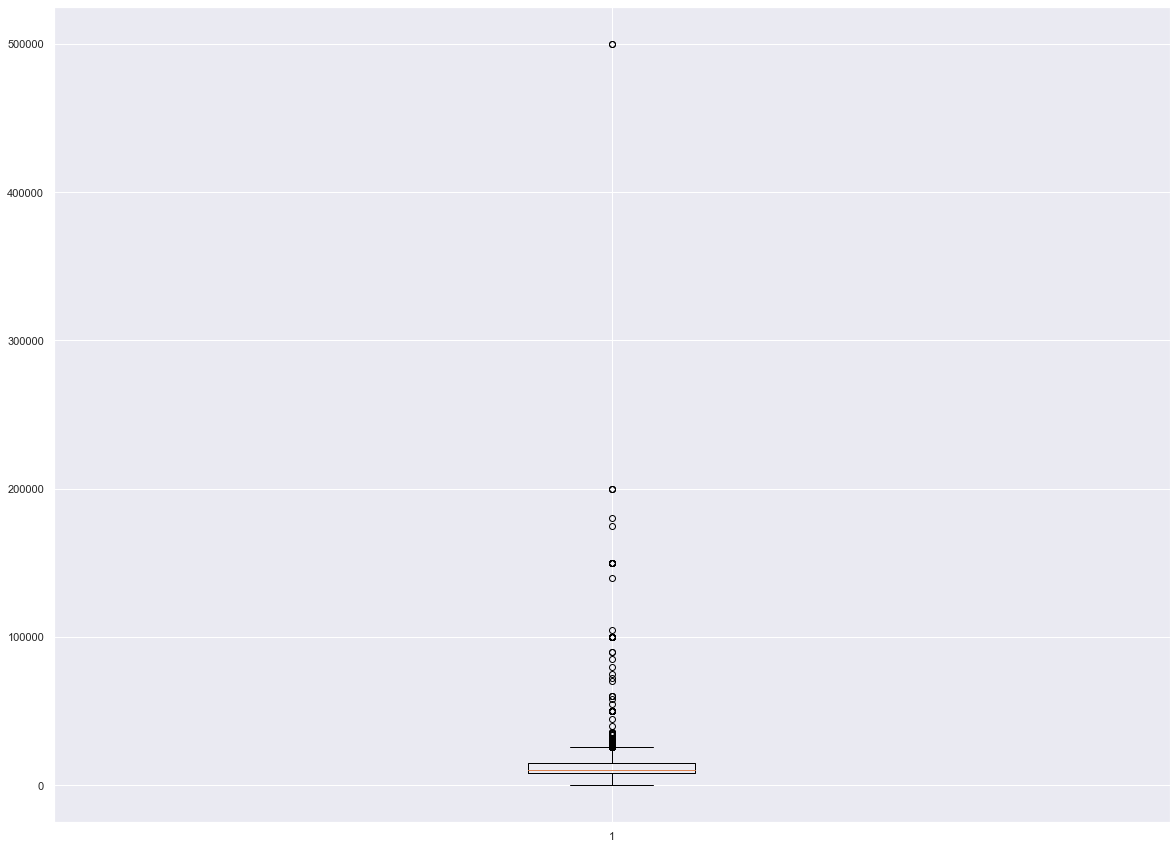

In [344]:
import matplotlib.pyplot as plt
data = df["ListingQuantity"]
 
fig = plt.figure(figsize =(20, 15))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [345]:
df = df[df['ListingQuantity'] < 25000]

In [346]:
#df = df[df['Status'] != 'REJECTED']

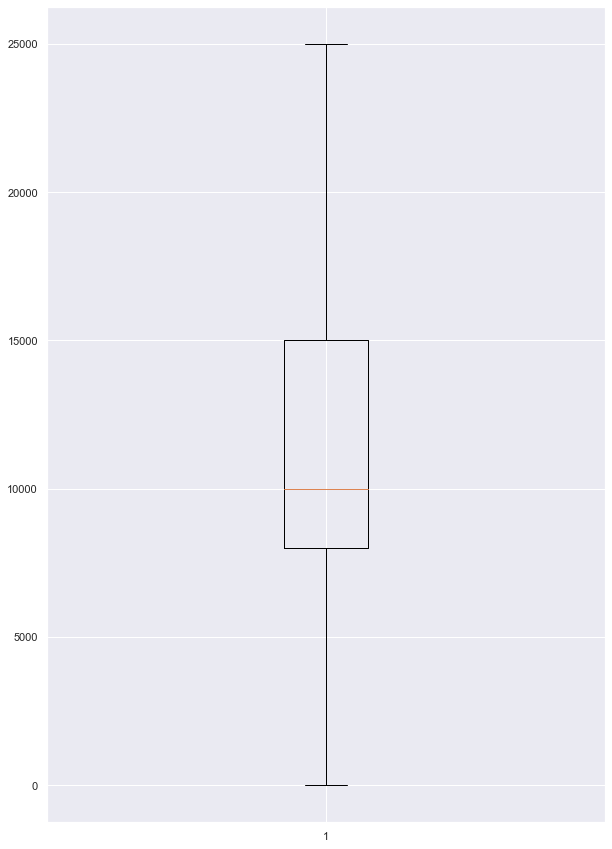

In [347]:
data = df["ListingQuantity"]
 
fig = plt.figure(figsize =(10, 15))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

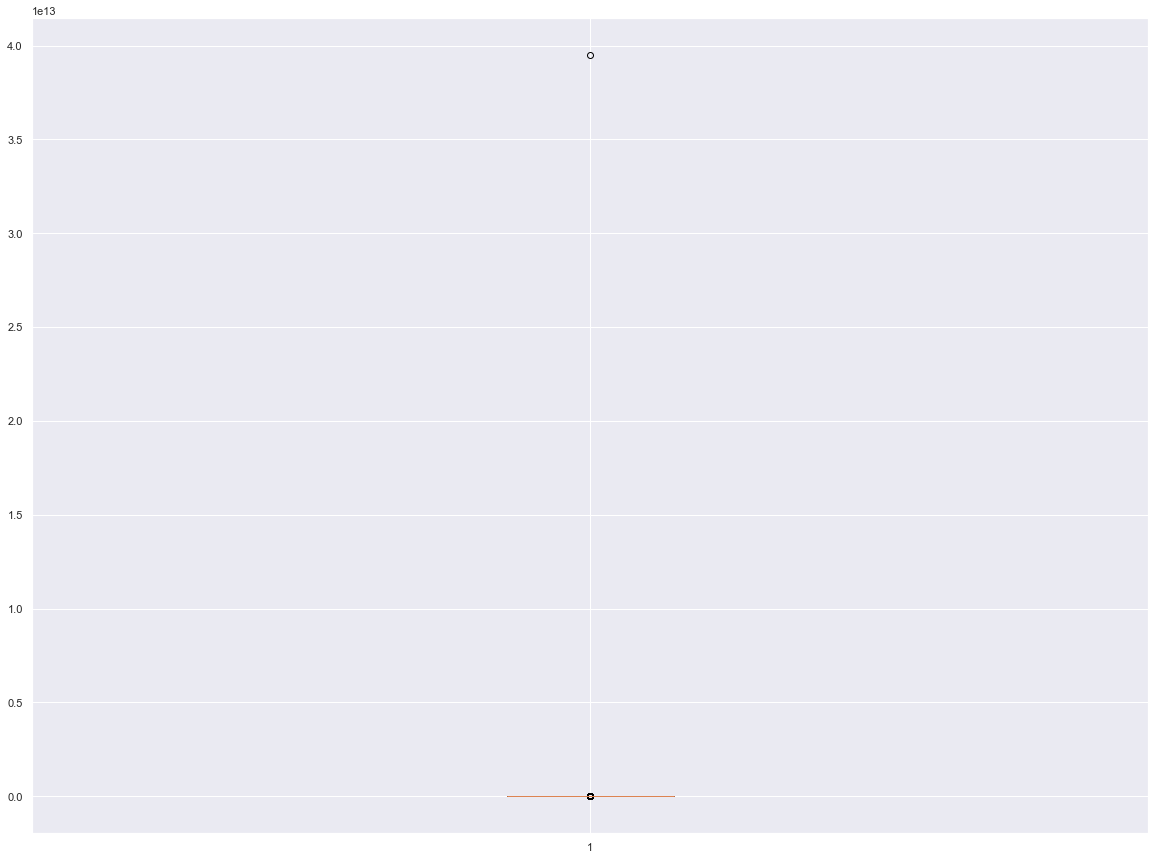

In [348]:
import matplotlib.pyplot as plt
data = df["PurchasePrice"]
 
fig = plt.figure(figsize =(20, 15))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [349]:
df=df[df["PurchasePrice"]<55]
df=df[df["PurchasePrice"]>30]

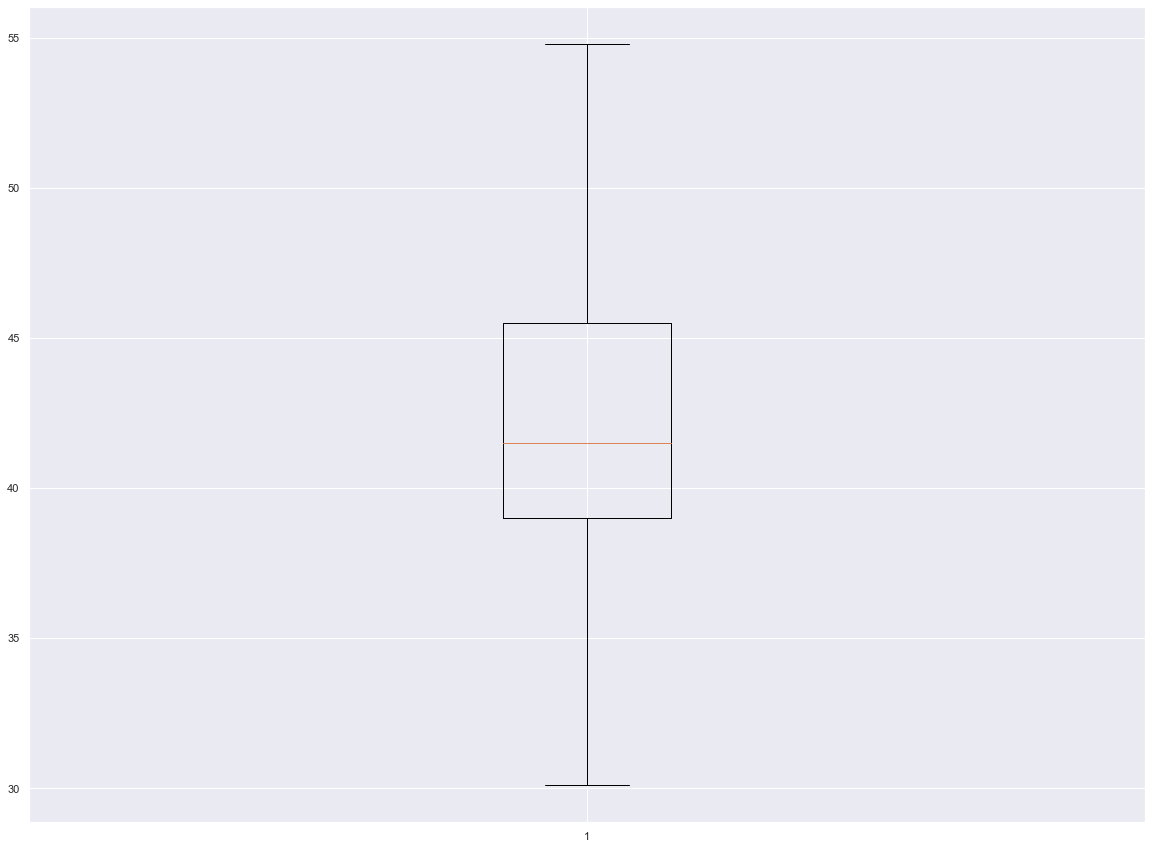

In [350]:
data = df["PurchasePrice"]
 
fig = plt.figure(figsize =(20, 15))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

<AxesSubplot:xlabel='ListingQuantity', ylabel='Count'>

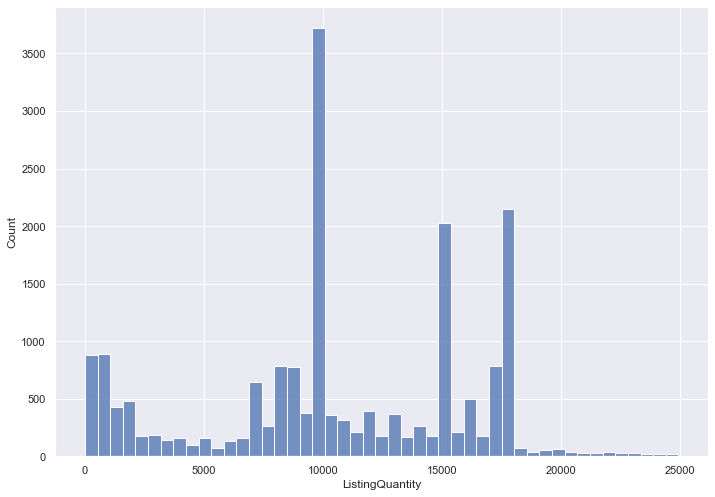

In [351]:
sns.histplot(data=df,x="ListingQuantity")

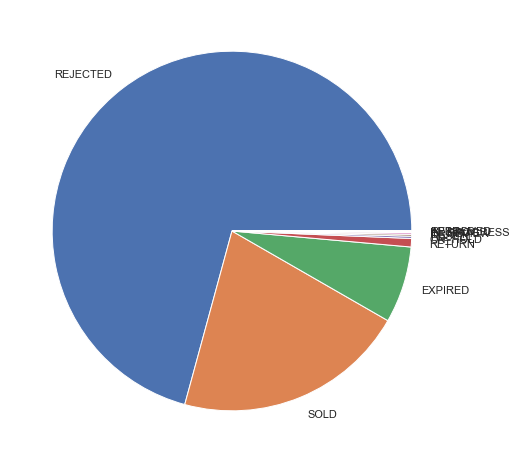

In [352]:
#plotly to plot histogram and pie chart
y = df['Status'].value_counts()
plt.pie(y,labels=list(df['Status'].unique()))
plt.show() 

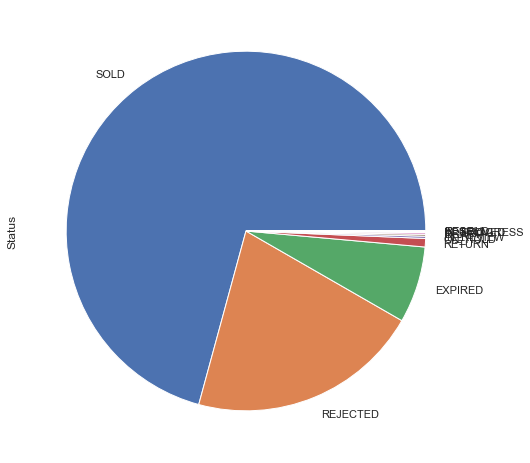

In [353]:
data= df['Status'].value_counts().plot(kind="pie",radius=1)

In [354]:
import plotly.express as px

In [355]:
column_to_plot = 'Status'
data_counts = df['Status'].value_counts()
print(data_counts)

SOLD           13611
REJECTED        4025
EXPIRED         1324
RETURN           146
ON_HOLD           38
IN_REVIEW         32
DRAFT             30
APPROVED          15
RESELL             9
IN_PROGRESS        2
RESOLD             1
Name: Status, dtype: int64


In [356]:
fig = px.pie(data_frame=df, values=data_counts.values, names=data_counts.index)
fig.show()

In [357]:
fig = px.histogram(data_frame=df, x='ListingQuantity')
fig.show()


In [423]:
fig = px.histogram(data_frame=df, x='PurchasePrice')
fig.show()

#obs
#normalisation


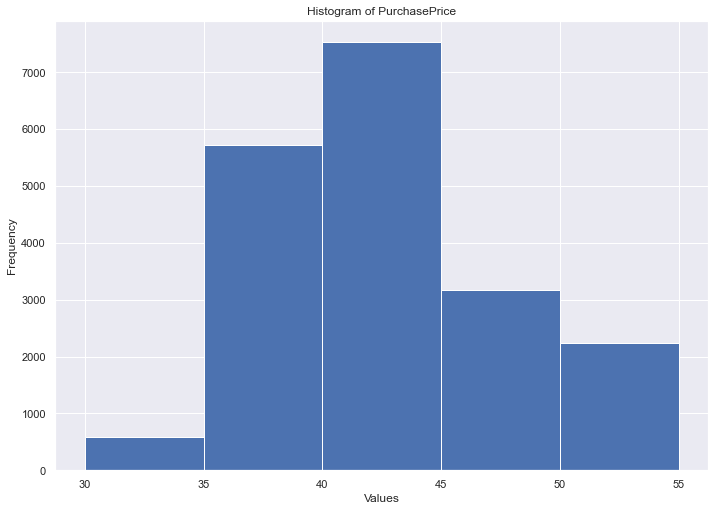

In [359]:
# Specify the column name you want to create a histogram for
column_name = "PurchasePrice"

# Create the histogram using matplotlib
plt.hist(df[column_name],bins=[30,35,40,45,50,55])

# Add labels and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of {}".format(column_name))

# Show the histogram
plt.show()

In [360]:
df["PurchasePrice"].min()

30.1

In [361]:
df["PurchasePrice"].max()

54.8

In [362]:
df.dtypes

ListingID           object
SellerID             int64
ItemName            object
Status              object
PurchasePrice      float64
ListingQuantity      int64
dtype: object

In [363]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df

,ListingID,ItemName,Status
0,LT0122011,PET Bottle Scrap Baled - Clear,REJECTED
1,LT0122021,PET Bottle Scrap Baled - Green,REJECTED
2,LT0122022,PET Bottle Scrap Baled - Clear,REJECTED
3,LT0122023,PET Bottle Scrap Baled - Clear,REJECTED
5,LT0122031,PET Liquor Bottle Scrap Baled,REJECTED
...,...,...,...
24133,LT1222314,PET Bottle Scrap Baled - Clear,REJECTED
24134,LT1222315,PET Bottle Scrap Baled - Clear,REJECTED
24135,LT1222316,PET Bottle Scrap Baled - Clear,SOLD
24136,LT1222317,PET Bottle Scrap Baled - Clear,SOLD


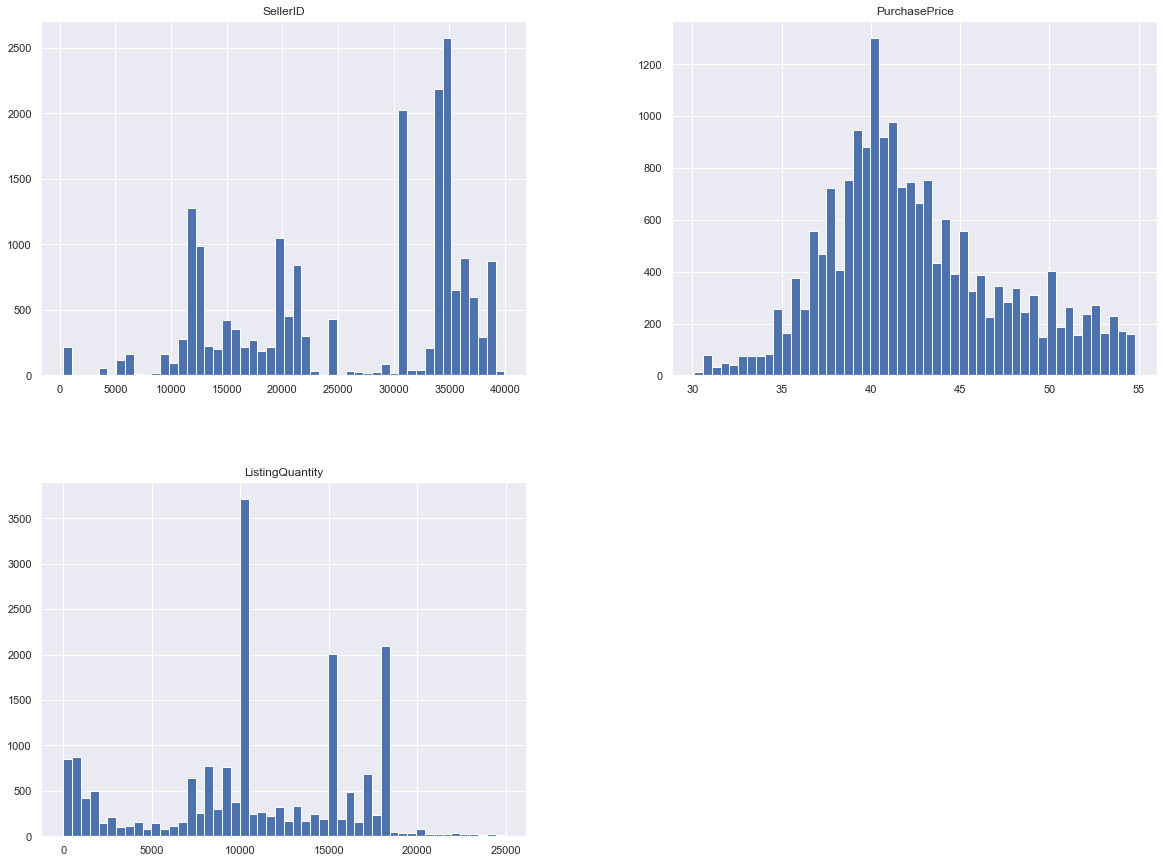

In [364]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [424]:
df.corr()

,ItemName,PurchasePrice,ListingQuantity
ItemName,1.000000,0.007401,-0.10528
PurchasePrice,0.007401,1.000000,-0.05616
ListingQuantity,-0.105280,-0.056160,1.00000


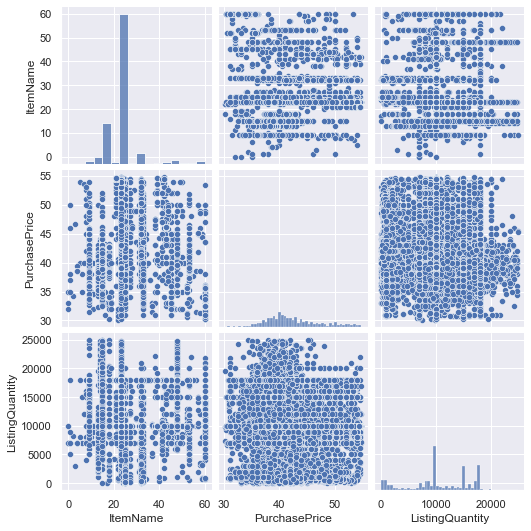

In [294]:
sns.pairplot(df)

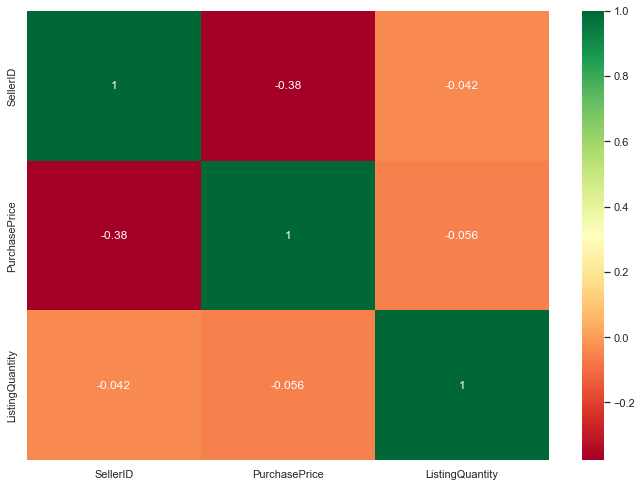

In [365]:
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure()
df_heatmap = sns.heatmap(df[top_corr_features].corr(),annot= True, cmap="RdYlGn")


In [ ]:
take out 2 var
convert item id to numerical
plot corr plot

name the whole project with respect to which part it is

scaling , test train etc


In [366]:
df=df.drop(["ListingID","SellerID","Status"],axis=1)

In [367]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df["ItemName"]= label_encoder.fit_transform(df["ItemName"])
  
df["ItemName"].unique()

array([23, 25, 32, 33, 24,  8, 21, 47, 45, 27, 10, 34, 22, 38, 50, 46, 15,
       60, 51, 52,  9, 31, 13, 48, 14, 12, 17, 18, 26, 57, 43,  5,  6, 29,
       19, 39, 56, 42, 55, 40, 37,  1,  0,  7, 59, 58, 53, 30, 16,  2, 49,
       41, 20, 11,  3, 28, 44, 36,  4, 54, 35])

In [368]:
df

,ItemName,PurchasePrice,ListingQuantity
0,23,50.0,10000
1,25,50.0,18000
2,23,46.5,10000
3,23,54.0,10000
5,32,50.0,7000
...,...,...,...
24133,23,46.0,15000
24134,23,46.0,10000
24135,23,45.4,15000
24136,23,46.5,15000


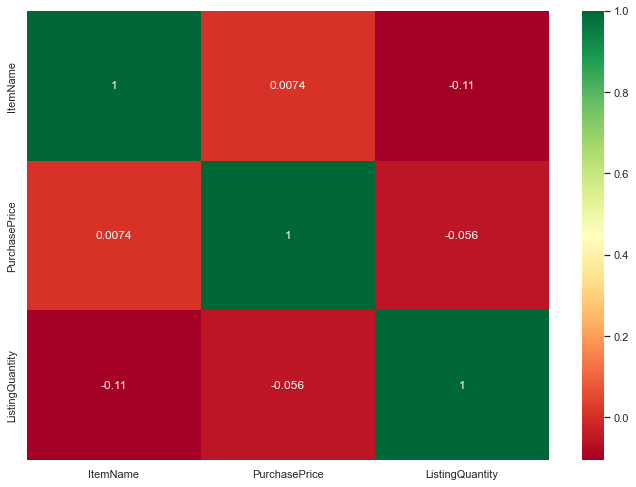

In [369]:
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure()
df_heatmap = sns.heatmap(df[top_corr_features].corr(),annot= True, cmap="RdYlGn")


In [370]:
#for dropping -inf values from the listingquantity column
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  
# Printing df
df

,ItemName,PurchasePrice,ListingQuantity
0,23,50.0,10000
1,25,50.0,18000
2,23,46.5,10000
3,23,54.0,10000
5,32,50.0,7000
...,...,...,...
24133,23,46.0,15000
24134,23,46.0,10000
24135,23,45.4,15000
24136,23,46.5,15000


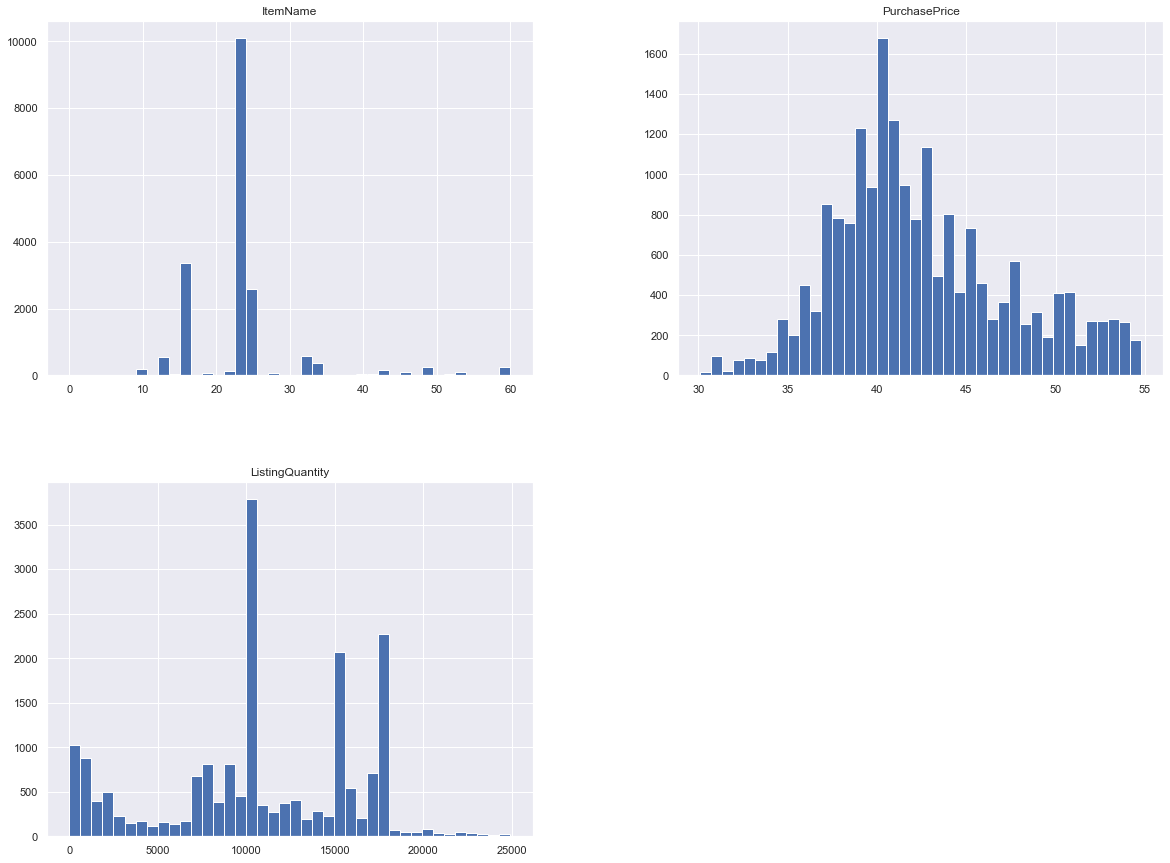

In [371]:
df.hist(bins=40,figsize=(20,15))
plt.show()

In [373]:
from sklearn.preprocessing import MinMaxScaler

In [377]:
scaler = MinMaxScaler()
columns= ["ItemName","PurchasePrice","ListingQuantity"]
data_scaled = scaler.fit_transform(df[columns])
data_scaled = pd.DataFrame(data_scaled, columns=columns)
print(data_scaled)

       ItemName  PurchasePrice  ListingQuantity
0      0.383333       0.805668         0.400883
1      0.416667       0.805668         0.721910
2      0.383333       0.663968         0.400883
3      0.383333       0.967611         0.400883
4      0.533333       0.805668         0.280498
...         ...            ...              ...
19228  0.383333       0.643725         0.601525
19229  0.383333       0.643725         0.400883
19230  0.383333       0.619433         0.601525
19231  0.383333       0.663968         0.601525
19232  0.383333       0.663968         0.601525

[19233 rows x 3 columns]


In [425]:
x=data_scaled[["PurchasePrice","ItemName"]].values
y=data_scaled[["ListingQuantity"]].values

print(x.shape)
print(y.shape)

(19233, 2)
(19233, 1)


In [426]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
import time
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score


# Define the regression models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Regression': SVR(),
    'Multi-layer Perceptron': MLPRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'Isotonic Regression': IsotonicRegression(),
}

# Evaluate models
for model_name, model in models.items():
    start_time = time.time()
    
    # Perform cross-validation
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    avg_r2_score = np.mean(scores)
    
    # Train the model on the full data
    model.fit(x, y)
    
    # Make predictions
    y_pred = model.predict(x)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    
    end_time = time.time()
    train_time = end_time - start_time
    
    # Print results
    print(f'Model: {model_name}')
    print(f'R2 Score: {avg_r2_score:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'Training Time: {train_time:.4f} seconds')
    print('-------------------------')


Model: Linear Regression
R2 Score: 0.0006
RMSE: 0.2222
MAE: 0.1794
Training Time: 0.1589 seconds
-------------------------
Model: Ridge
R2 Score: 0.0006
RMSE: 0.2222
MAE: 0.1794
Training Time: 0.0699 seconds
-------------------------
Model: Lasso
R2 Score: -0.0112
RMSE: 0.2238
MAE: 0.1808
Training Time: 0.0839 seconds
-------------------------
Model: ElasticNet
R2 Score: -0.0112
RMSE: 0.2238
MAE: 0.1808
Training Time: 0.0568 seconds
-------------------------
Model: K-Nearest Neighbors
R2 Score: 0.3446
RMSE: 0.1541
MAE: 0.1168
Training Time: 0.8259 seconds
-------------------------
Model: Decision Tree
R2 Score: 0.3812
RMSE: 0.1306
MAE: 0.0993
Training Time: 0.2970 seconds
-------------------------
Model: Random Forest
R2 Score: 0.4381
RMSE: 0.1315
MAE: 0.1016
Training Time: 16.7224 seconds
-------------------------
Model: Gradient Boosting
R2 Score: 0.5112
RMSE: 0.1472
MAE: 0.1216
Training Time: 7.0251 seconds
-------------------------
Model: AdaBoost
R2 Score: 0.4009
RMSE: 0.1742
MAE:

In [417]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
models={
 'LinearRegression':LinearRegression(),
 'Lasso':Lasso(),
 'Ridge':Ridge(),
 'GradientBoostingRegressor':GradientBoostingRegressor(),
 'AdaBoostRegressor':AdaBoostRegressor(),
 'RandomForestRegressor':RandomForestRegressor(),
 'KneghborsRegressor':KNeighborsRegressor()
}

In [418]:
for name, model in models.items():
 scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
 print('ss validaton model:{}'.format(name))
 rmse=np.sqrt(-scores)
 rmse_avarage=np.mean(rmse)
 print('AVARAGE RMSE:',rmse_avarage)
 print('*'*100)

ss validaton model:LinearRegression
AVARAGE RMSE: 0.22243459624855105
****************************************************************************************************
ss validaton model:Lasso
AVARAGE RMSE: 0.2236777880505319
****************************************************************************************************
ss validaton model:Ridge
AVARAGE RMSE: 0.22243391241938423
****************************************************************************************************
ss validaton model:GradientBoostingRegressor
AVARAGE RMSE: 0.1530920314292996
****************************************************************************************************
ss validaton model:AdaBoostRegressor
AVARAGE RMSE: 0.17406050319689542
****************************************************************************************************
ss validaton model:RandomForestRegressor
AVARAGE RMSE: 0.16043547388590945
************************************************************************************

In [415]:
#using gradient boosting regression


In [419]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [420]:
y_pred = model.predict(x_test)


In [421]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.021007424181735873


In [422]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,0.400883,0.541027
1,0.721910,0.526018
2,0.400883,0.515325
3,0.400883,0.478518
4,0.280498,0.061139
...,...,...
3842,0.484551,0.482847
3843,0.404294,0.252089
3844,0.620787,0.506943
3845,0.320626,0.066304
